In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_df = pd.read_csv('/kaggle/input/amazon-reviews/train.csv') 
test_df= pd.read_csv('/kaggle/input/amazon-reviews/test.csv')

In [4]:
train_df.shape


(3600000, 2)

In [5]:
test_df.shape

(400000, 2)

In [6]:
# nltk.data.path.append('/kaggle/input/YOUR-UPLOADED-NLTK-DATA/nltk_data')


In [7]:
import pandas as pd

# Adjust pandas display settings to show more of the text
pd.set_option('display.max_colwidth', None)  # Set to None to not truncate text

# Randomly select 5 rows from the dataset and display the full text
random_reviews = train_df.sample(5)
random_reviews[['label', 'text']]


,label,text
2222202,positive,Great video depicting what life was like a long time ago.: It's got a nice little story to go along with it about a baby reptile struggling to survive. The CGI is REALLY good. My family saw this in the IMAX theater and really loved it. Now my 6 yr wants to see it all the time. A positive influence on young girls wanting to be scientists as the main researcher is a woman.
2101580,positive,"The Wrong Case by James Crumley: Another craftily interwoven hunt for the answer leaves me hanging til the very end to see how all the pieces tie together. I am a bit prejudices because I love the references to Montana and the Northwest and characters true to life on the seedy side of town... but the unfolding is great, no matter where he take us! I still don't know who done it or what case is the right case and I am only 40 pages from the end. Milo is one tough privite eye who keeps me coming back for more!The Wrong Case"
3255089,positive,"Lego Mars Mission MT-51Claw-Tank Ambush: My grandson loves this Lego Mars Mission MT-51 Clae-Tank Ambush, he is a lego buff. This lego set was from an old series and it was everything he wanted it to be. I'm sure we will make other purchases in the future.Thanks"
1565372,positive,"T-fall frying pan: I love this pan, nothing sticks and it can go from stove top to the oven. Cooks illustrated recommended the T-Fall pans and that is why I bought it"
2050320,negative,"WATCH THE WHOLE THING: ok, granted, it's absolutely awful, the worst movie i have ever seen on any and all levels of moviemaking. HOWEVER, you really need to watch the whole thing, because it simply boggles the mind how bad this thing is. at the end, as your brain slowly melts out your ears, you'll thank me."


In [8]:
train_df.columns

Index(['label', 'text'], dtype='object')

In [9]:
train_df['label'].value_counts()


label
positive    1800000
negative    1800000
Name: count, dtype: int64

In [10]:
train_df['text'][0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [11]:
for df in [train_df, test_df]:
    df['text_clean'] = df['text'].str.replace(r"[^a-zA-Z\s]", '', regex=True)
    df['text_clean'] = df['text_clean'].str.lower().str.strip()
    # sw = set(stopwords.words('english'))
    # def remove_stopwords(text):
    #     return ' '.join([word for word in text.split() if word.lower() not in sw])
    # df['text_clean'] = df['text'].apply(remove_stopwords)


In [12]:
sw = set(stopwords.words('english'))
negations = {"no", "not", "nor", "dont", "didnt", "isnt", "wasnt", "shouldnt", "wont", "cant", "couldnt"}
sw = sw.difference(negations)

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in sw])

train_df['text_clean'] = train_df['text_clean'].apply(remove_stopwords)
test_df['text_clean'] = test_df['text_clean'].apply(remove_stopwords)

## Attempted Lemmatization

In [13]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

In [14]:
# def lemmatize_tokenizer(text):
#     text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove non-letters
#     tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens if token not in sw and len(token) > 2]
#     return lemmas

### Attempting Tokenization

In [15]:
def tokenize_text(text):
    # Remove non-alphabet characters
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Lowercase and tokenize
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stopwords and short tokens
    tokens = [token for token in tokens if token not in sw and len(token) > 2]
    
    return tokens

In [16]:
train_df['tokens'] = train_df['text_clean'].apply(tokenize_text)


In [17]:
train_df['text_clean'][0]


'stuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

#### We’ll use TF-IDF (or CountVectorizer) to convert the text into numbers the model can understand.



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # You can tweak this number
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])

y_train = train_df['label']
y_test = test_df['label']


In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = model.predict(X_test)

logreg_acc=accuracy_score(y_test, y_pred)
print("Accuracy:",logreg_acc )
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8979875

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.90      0.90    200000
    positive       0.90      0.90      0.90    200000

    accuracy                           0.90    400000
   macro avg       0.90      0.90      0.90    400000
weighted avg       0.90      0.90      0.90    400000



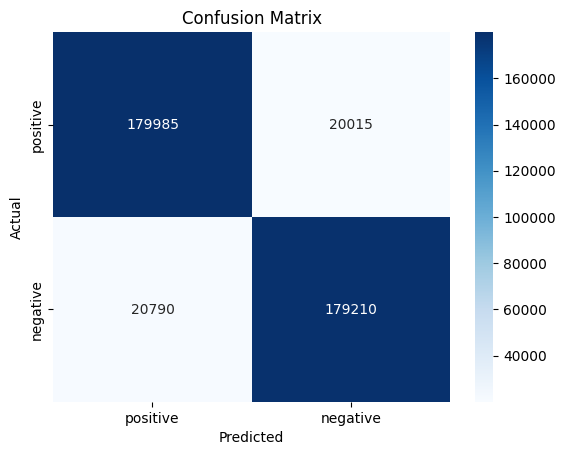

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear']  # for L1 support
# }
# model = LogisticRegression(max_iter=1000)
# grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best Accuracy:", grid.best_score_)


In [23]:
# # Predict on the test set
# y_pred = best_model.predict(X_test)

# # Generate evaluation metrics
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# conf_matrix, class_report, accuracy

## Predicting 

In [24]:
def predict_sentiment(text):
    # Clean input
    cleaned = re.sub(r"[^a-zA-Z\s]", '', text)
    cleaned = cleaned.lower().strip()
    cleaned = ' '.join([word for word in cleaned.split() if word not in sw])
    
    # Vectorize and predict
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)[0]
    return prediction

### Testing Predictions live

In [25]:

# while True:
#     user_input = input("Enter a review: ")
#     if user_input.lower() == 'exit':
#         break
#     print("Predicted sentiment:", predict_sentiment(user_input))


In [26]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Naive Bayes': MultinomialNB(),
#     'Linear SVM': LinearSVC(),
#     'Random Forest': RandomForestClassifier(n_estimators=100),
#     'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
# }

# results = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     acc = accuracy_score(y_test, preds)
#     results[name] = acc
#     print(f"\n{name} Accuracy: {acc:.4f}")
#     print(classification_report(y_test, preds))


In [27]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)


In [28]:
# Load the model
with open('logistic_regression_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)


# UNSUPERVISED

In [29]:
# Install if needed
!pip install nltk

# Import
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize
vader = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Apply VADER to Text
#### You take each review and get its compound score (ranges from -1 to 1).

In [30]:
def vader_sentiment(text):
    scores = vader.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score


In [31]:
def classify_sentiment_vader(text):
    score = vader_sentiment(text)
    if score >= 0:
        return 1   # Positive
    else:
        return 0   # Negative


#### Now, you can apply this classify_sentiment_vader() function to all your reviews!

In [32]:
# Apply VADER classifier
test_df['vader_prediction'] = test_df['text'].apply(classify_sentiment_vader)


In [33]:
label_map = {1: 'positive', 0: 'negative'}
test_df['vader_prediction'] = test_df['vader_prediction'].map(label_map)


In [34]:
from sklearn.metrics import accuracy_score

# Compare VADER prediction with true labels
vader_acc = accuracy_score(test_df['label'], test_df['vader_prediction'])

print(f"VADER Accuracy: {vader_acc:.4f}")


VADER Accuracy: 0.7115


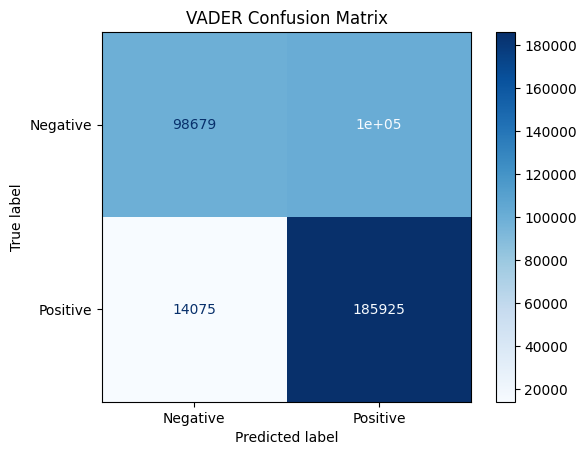

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Compute the confusion matrix
vader_cm = confusion_matrix(test_df['label'], test_df['vader_prediction'])

# 2. Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=vader_cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('VADER Confusion Matrix')
plt.show()


In [36]:
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Initialize VADER
# sia = SentimentIntensityAnalyzer()

# print("Type a sentence to analyze sentiment (type 'exit' to quit):")

# while True:
#     text = input("\nYour input: ")
#     if text.lower() == 'exit':
#         break
    
#     scores = sia.polarity_scores(text)
#     compound = scores['compound']

#     # Simple rules to interpret compound score
#     if compound >= 0.05:
#         sentiment = "Positive 😀"
#     elif compound <= -0.05:
#         sentiment = "Negative 😞"
#     else:
#         sentiment = "Neutral 😐"

#     print(f"Sentiment: {sentiment}")
#     print(f"Detailed Scores: {scores}")


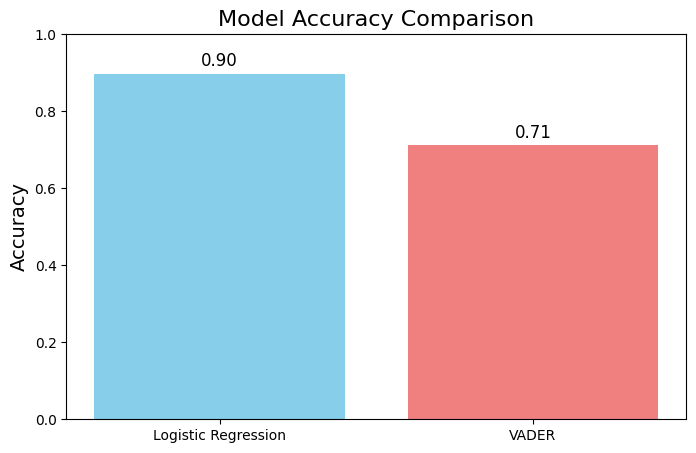

In [37]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'VADER']
accuracies = [logreg_acc, vader_acc]

# Create the bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1)  # Accuracy goes from 0 to 1
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)

plt.show()
